In [1]:
%matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats
import matplotlib.pylab as plb

from scipy.stats import linregress


In [3]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)

In [5]:
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month

In [6]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]

In [7]:
housing_df3 = residential_df[['BATHRM','WARD','BEDRM','HF_BATHRM','YEAR','PRICE']]
housing_df3 = housing_df3[~(housing_df3['YEAR'] < 2007.0)] 
housing_df3 = housing_df3[~(housing_df3['YEAR'] > 2017.0)]

In [8]:
two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
two_bed_two_bath_df = two_bed_two_bath[two_bed_two_bath['BEDRM'] == 2]
two_bed_two_bath_df2 = two_bed_two_bath_df[two_bed_two_bath_df['BATHRM'] == 2]
two_bed_two_bath_df3 = two_bed_two_bath_df2[two_bed_two_bath_df2['HF_BATHRM'] == 0]
two_bed_two_bath_avg = pd.DataFrame(two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
two_bed_two_bath_avg = two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

two_bed_two_bath_avg_df = two_bed_two_bath_avg.reset_index()
two_bed_two_bath_avg_df


YEAR  2Bd 2Ba Price
0   2007.0  422500.000000
1   2008.0  365000.000000
2   2009.0  441166.666667
3   2010.0  492466.666667
4   2011.0  437750.000000
5   2012.0  724900.000000
6   2013.0  516582.500000
7   2014.0  657285.714286
8   2015.0  691464.285714
9   2016.0  699387.500000
10  2017.0  707333.333333

35646.1829004329
-71160498.48051947


<IPython.core.display.Javascript object>


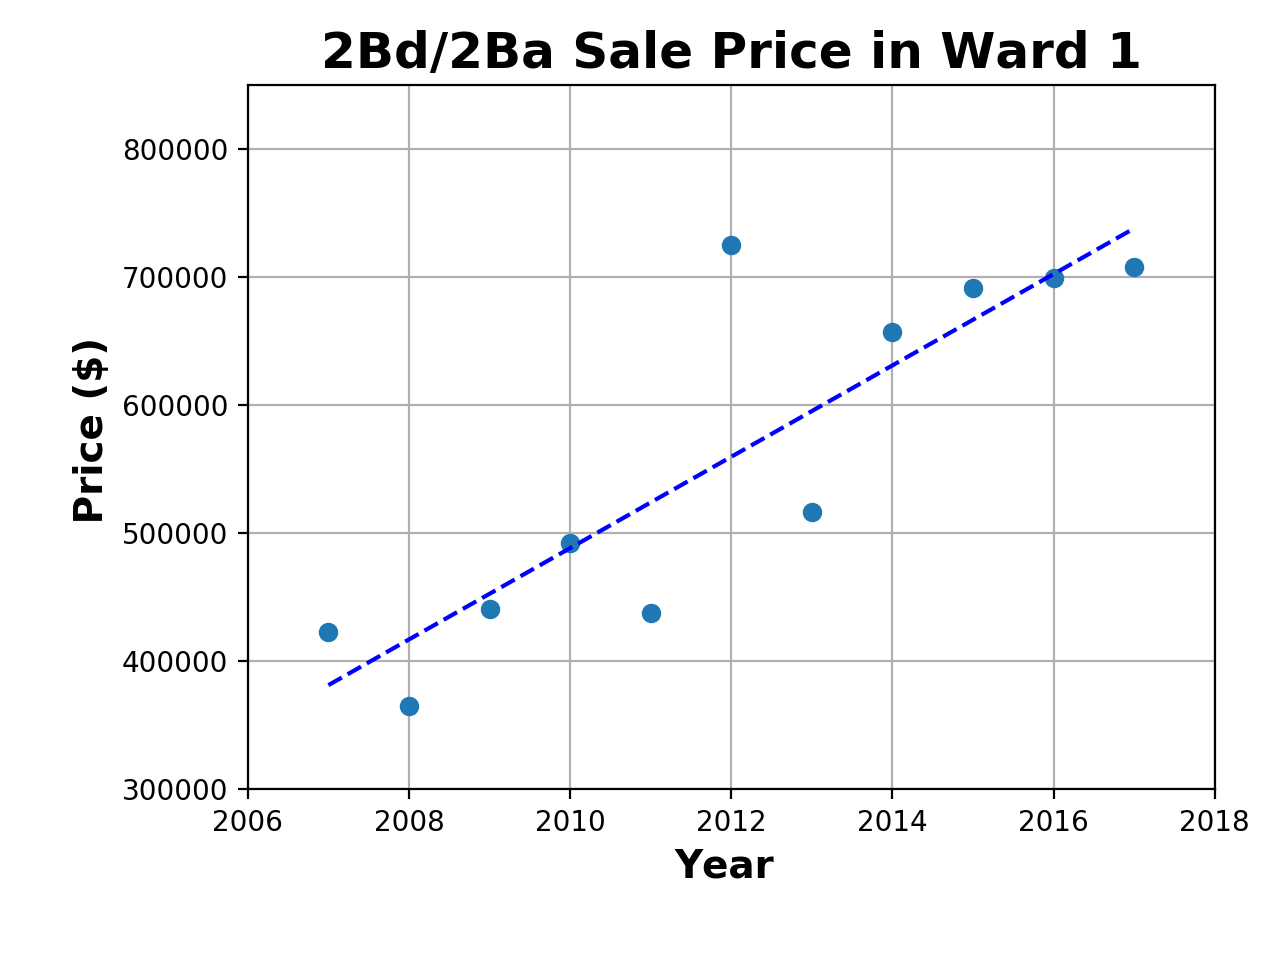

In [9]:
x = two_bed_two_bath_avg_df['YEAR']
y = two_bed_two_bath_avg_df['2Bd 2Ba Price']


(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept
s=slope
yint=intercept
print(s)
print(yint)


# Plot data
fig, ax = plt.subplots()

ax.set_xlim(2006,2018)
ax.set_ylim(300000,850000)

ax.set_xlabel("Year \n", fontsize=14, fontweight='bold')
ax.set_ylabel("\n Price ($)", fontsize=14, fontweight='bold')

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.title("2Bd/2Ba Sale Price in Ward 1", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.grid()

plt.show()


plt.savefig("NewImages/ward1_type_scatter.png")




In [10]:
year1 = 2020.0
year1_price = s * year1 + yint
print("The average sale price in ward 1 in 2020 will be " +
      str(s * year1 + yint) + ".")

year2 = 2025.0
year2_price = s * year2 + yint
print("The average sale price in ward 1 in 2025 will be " +
      str(s * year2 + yint) + ".")

profit = year2_price - year1_price
print(profit)

The average sale price in ward 1 in 2020 will be 844790.9783549756.
The average sale price in ward 1 in 2025 will be 1023021.8928571492.
178230.91450217366


In [11]:
ward_2_four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_four_bed_three_bath_df = ward_2_four_bed_three_bath[ward_2_four_bed_three_bath['BEDRM'] == 4]
ward_2_four_bed_three_bath_df2 = ward_2_four_bed_three_bath_df[ward_2_four_bed_three_bath_df['BATHRM'] == 3]
ward_2_four_bed_three_bath_df3 = ward_2_four_bed_three_bath_df2[ward_2_four_bed_three_bath_df2['HF_BATHRM'] == 0]
ward_2_four_bed_three_bath_avg = pd.DataFrame(ward_2_four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_four_bed_three_bath_avg = ward_2_four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})

ward_2_four_bed_three_bath_avg_df = ward_2_four_bed_three_bath_avg.reset_index()
ward_2_four_bed_three_bath_avg_df

YEAR  4Bd 3Ba Price
0  2007.0   9.582000e+05
1  2008.0   8.255000e+05
2  2011.0   1.243333e+06
3  2012.0   1.102143e+06
4  2013.0   1.707500e+06
5  2014.0   8.860000e+05
6  2015.0   1.436444e+06
7  2016.0   1.555667e+06
8  2017.0   1.559083e+06

65879.59531296795
-131333693.25209644


<IPython.core.display.Javascript object>


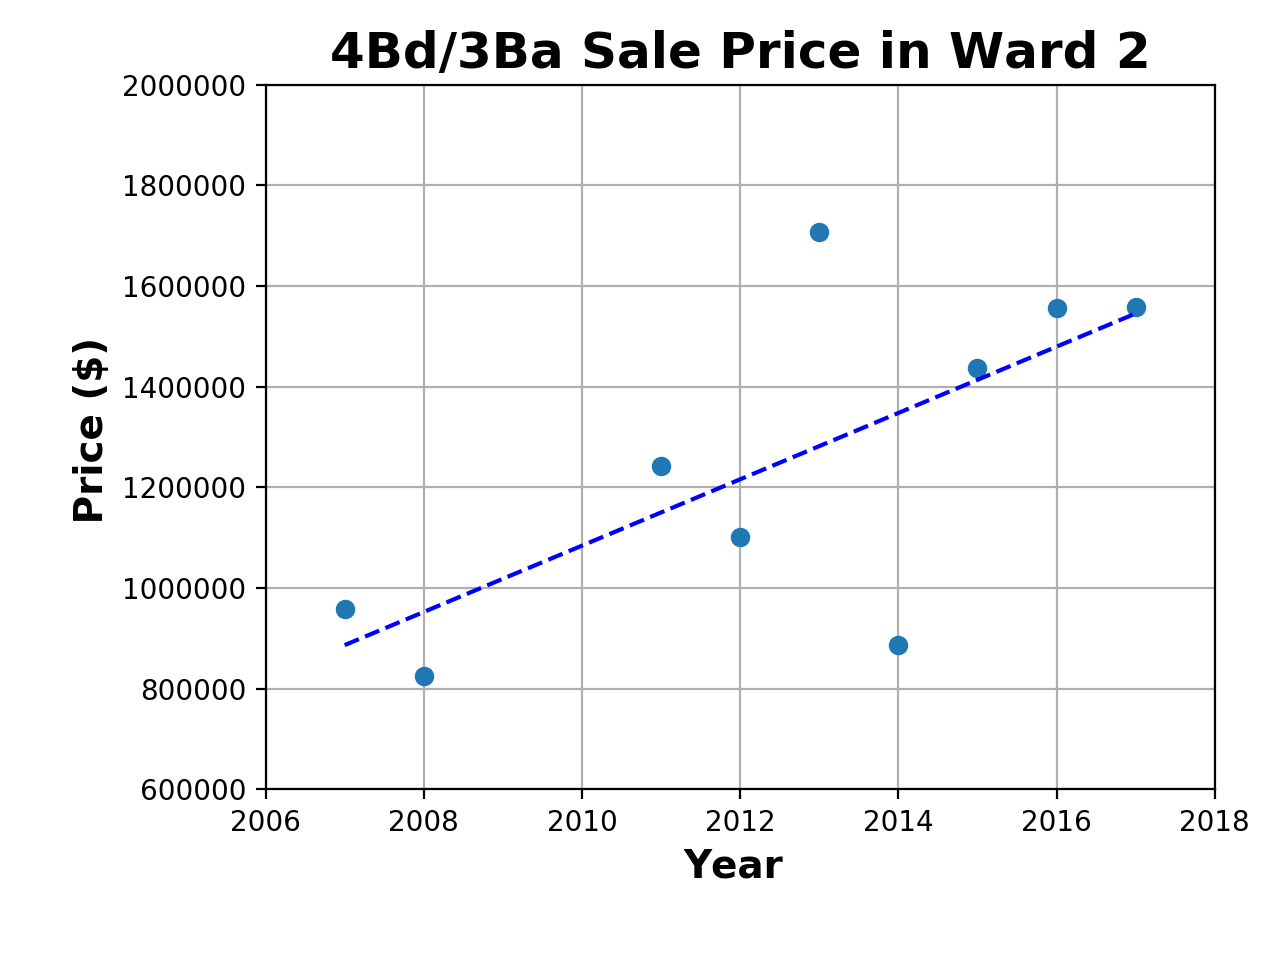

In [12]:
x2 = ward_2_four_bed_three_bath_avg_df['YEAR']
y2 = ward_2_four_bed_three_bath_avg_df['4Bd 3Ba Price']


(slope, intercept, _, _, _) = linregress(x2, y2)
fit = slope * x2 + intercept
s=slope
yint=intercept
print(s)
print(yint)


# Plot data
fig, ax = plt.subplots()

ax.set_xlim(2006,2018)
ax.set_ylim(600000,2000000)

ax.set_xlabel("Year \n", fontsize=14, fontweight='bold')
ax.set_ylabel("\n Price ($)", fontsize=14, fontweight='bold')

ax.plot(x2, y2, linewidth=0, marker='o')
ax.plot(x2, fit, 'b--')

plt.title("4Bd/3Ba Sale Price in Ward 2", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.grid()

plt.show()

plt.savefig("NewImages/ward2_type_scatter.png")

In [13]:
year1 = 2020.0
year1_price = s * year1 + yint
print("The average sale price in ward 2 in 2020 will be " +
      str(s * year1 + yint) + ".")

year2 = 2025.0
year2_price = s * year2 + yint
print("The average sale price in ward 2 in 2025 will be " +
      str(s * year2 + yint) + ".")

profit = year2_price - year1_price
print(profit)

The average sale price in ward 2 in 2020 will be 1743089.2800988257.
The average sale price in ward 2 in 2025 will be 2072487.2566636652.
329397.9765648395


In [14]:
ward_3_three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_three_bed_two_bath_df = ward_3_three_bed_two_bath[ward_3_three_bed_two_bath['BEDRM'] == 3]
ward_3_three_bed_two_bath_df2 = ward_3_three_bed_two_bath_df[ward_3_three_bed_two_bath_df['BATHRM'] == 2]
ward_3_three_bed_two_bath_df3 = ward_3_three_bed_two_bath_df2[ward_3_three_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_3_three_bed_two_bath_avg = pd.DataFrame(ward_3_three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_three_bed_two_bath_avg = ward_3_three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

ward_3_three_bed_two_bath_avg_df = ward_3_three_bed_two_bath_avg.reset_index()
ward_3_three_bed_two_bath_avg_df

YEAR  3Bd 2Ba Price
0   2007.0  710429.500000
1   2008.0  743739.411765
2   2009.0  808675.000000
3   2010.0  697112.541667
4   2011.0  725185.185185
5   2012.0  709560.653846
6   2013.0  839153.260870
7   2014.0  874371.100000
8   2015.0  876402.500000
9   2016.0  888178.542857
10  2017.0  916105.758621

20707.322816584026
-40864141.374711595


<IPython.core.display.Javascript object>


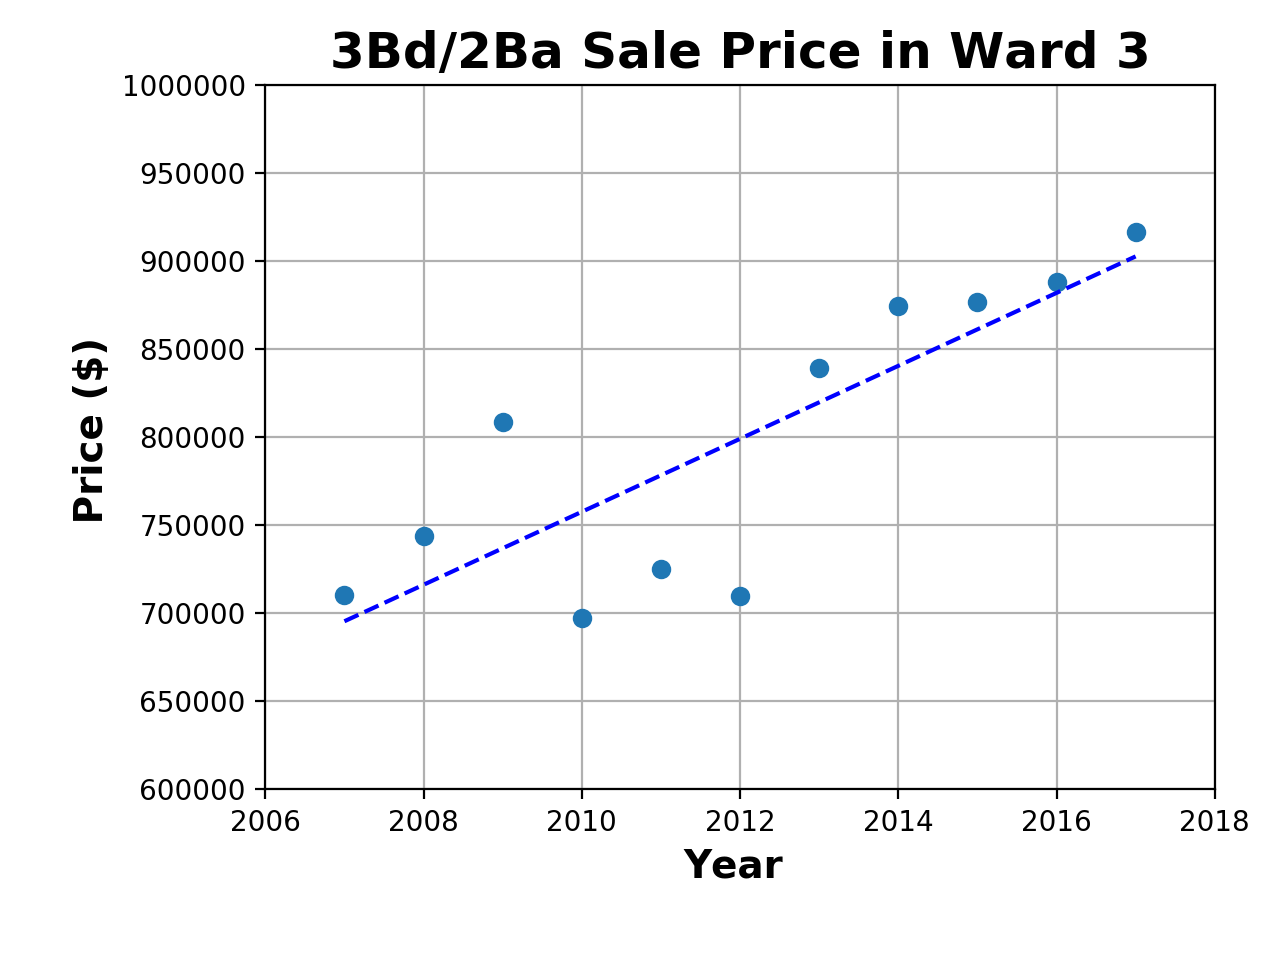

In [15]:
x3 = ward_3_three_bed_two_bath_avg_df['YEAR']
y3 = ward_3_three_bed_two_bath_avg_df['3Bd 2Ba Price']

(slope, intercept, _, _, _) = linregress(x3, y3)
fit = slope * x3 + intercept
s=slope
yint=intercept
print(s)
print(yint)

# Plot data
fig, ax = plt.subplots()

ax.set_xlim(2006,2018)
ax.set_ylim(600000,1000000)

ax.set_xlabel("Year \n", fontsize=14, fontweight='bold')
ax.set_ylabel("\n Price ($)", fontsize=14, fontweight='bold')

ax.plot(x3, y3, linewidth=0, marker='o')
ax.plot(x3, fit, 'b--')

plt.title("3Bd/2Ba Sale Price in Ward 3", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.grid()

plt.show()

plt.savefig("NewImages/ward3_type_scatter.png")

In [16]:
year1 = 2020.0
year1_price = s * year1 + yint
print("The average sale price in ward 3 in 2020 will be " +
      str(s * year1 + yint) + ".")

year2 = 2025.0
year2_price = s * year2 + yint
print("The average sale price in ward 3 in 2025 will be " +
      str(s * year2 + yint) + ".")

profit = year2_price - year1_price
print(profit)

The average sale price in ward 3 in 2020 will be 964650.7147881389.
The average sale price in ward 3 in 2025 will be 1068187.3288710564.
103536.61408291757


In [17]:
ward_4_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_two_bed_one_bath_df = ward_4_two_bed_one_bath[ward_4_two_bed_one_bath['BEDRM'] == 2]
ward_4_two_bed_one_bath_df2 = ward_4_two_bed_one_bath_df[ward_4_two_bed_one_bath_df['BATHRM'] == 1]
ward_4_two_bed_one_bath_df3 = ward_4_two_bed_one_bath_df2[ward_4_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_4_two_bed_one_bath_avg = pd.DataFrame(ward_4_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_two_bed_one_bath_avg = ward_4_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_4_two_bed_one_bath_avg_df = ward_4_two_bed_one_bath_avg.reset_index()
ward_4_two_bed_one_bath_avg_df

YEAR  2Bd 1Ba Price
0   2007.0  277272.000000
1   2008.0  302000.000000
2   2009.0  256337.500000
3   2010.0  230633.333333
4   2011.0  229966.666667
5   2012.0  217125.000000
6   2013.0  364083.333333
7   2014.0  332585.666667
8   2015.0  378714.142857
9   2016.0  431493.750000
10  2017.0  498829.300000

21190.11601731602
-42314600.636580095


<IPython.core.display.Javascript object>


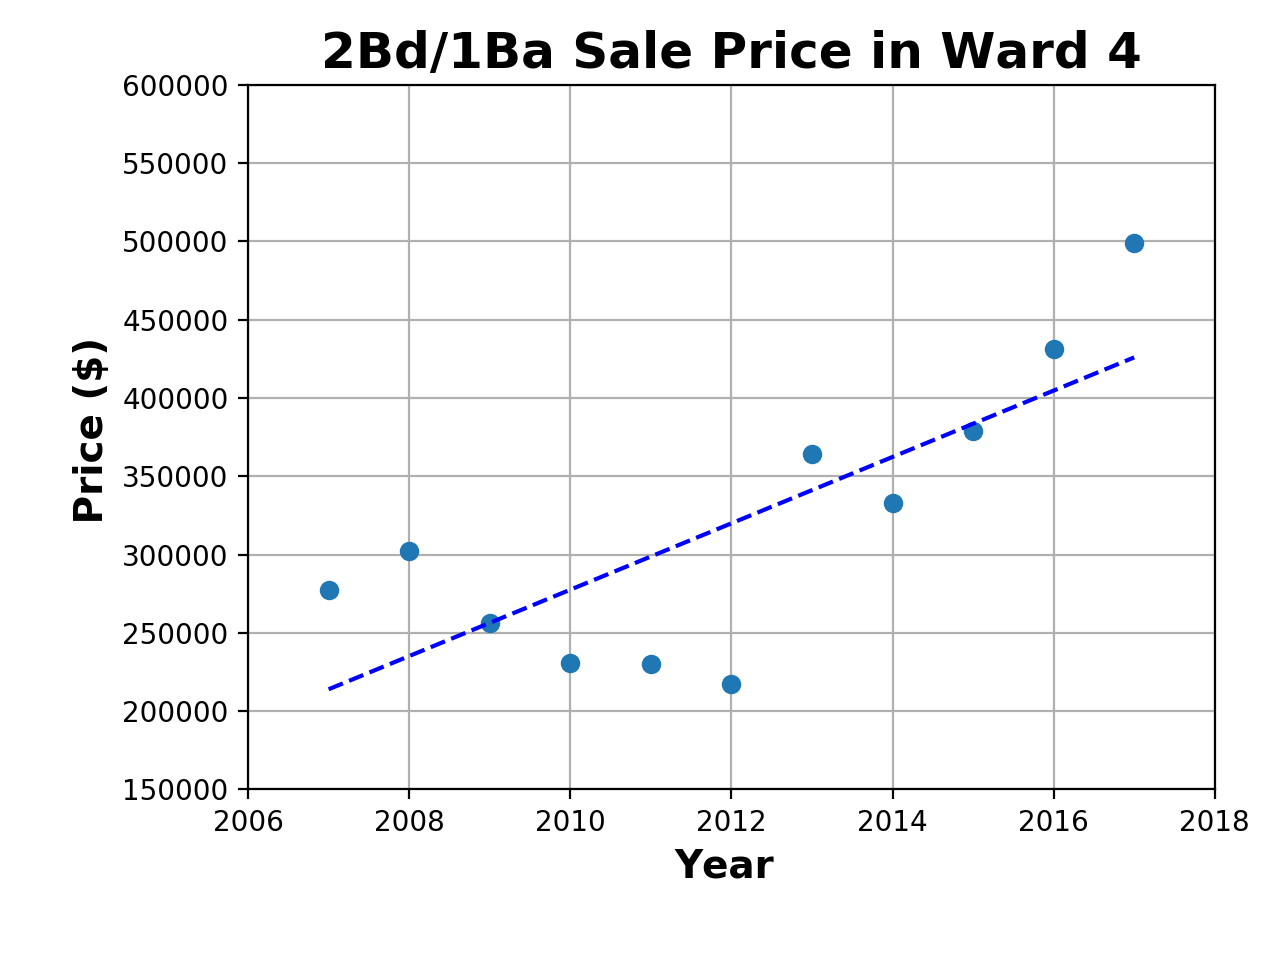

In [24]:
x4 = ward_4_two_bed_one_bath_avg_df['YEAR']
y4 = ward_4_two_bed_one_bath_avg_df['2Bd 1Ba Price']

(slope, intercept, _, _, _) = linregress(x4, y4)
fit = slope * x4 + intercept
s=slope
yint=intercept
print(s)
print(yint)


# Plot data
fig, ax = plt.subplots()

ax.set_xlim(2006,2018)
ax.set_ylim(150000,600000)

ax.set_xlabel("Year \n", fontsize=14, fontweight='bold')
ax.set_ylabel("\n Price ($)", fontsize=14, fontweight='bold')

ax.plot(x4, y4, linewidth=0, marker='o')
ax.plot(x4, fit, 'b--')

plt.title("2Bd/1Ba Sale Price in Ward 4", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.grid()

plt.show()

plt.savefig("NewImages/ward4_type_scatter.png")

In [19]:
year1 = 2020.0
year1_price = s * year1 + yint
print("The average sale price in ward 4 in 2020 will be " +
      str(s * year1 + yint) + ".")

year2 = 2025.0
year2_price = s * year2 + yint
print("The average sale price in ward 4 in 2025 will be " +
      str(s * year2 + yint) + ".")

profit = year2_price - year1_price
print(profit)

The average sale price in ward 4 in 2020 will be 489433.71839826554.
The average sale price in ward 4 in 2025 will be 595384.298484847.
105950.58008658141
